In [115]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [116]:
os.chdir('/home/minh/Research/RL_for_AL_acquisition')
EXPERIMENT_DIR = '/home/minh/Research/RL_for_AL_acquisition/results/mnist_classification_0.002_data_per_step_with_0.05_rare_class'

In [117]:
def get_result_df(experiment_dir: str, data_type: str):
    master_df = None
    for subdir, dirs, files in os.walk(experiment_dir):
        for file in files:
            if file == f"{data_type}_results.csv":
                folder_ls = subdir.split('/')
                sampler = folder_ls[-2]
                run_timestamp = folder_ls[-1]
                df = pd.read_csv(os.path.join(subdir, file), header=0) # names=column_names)
                df["data_type"] = data_type
                df["exp_timestamp"] = run_timestamp
                df["sampler_type"] = sampler
                if len(df) >= 100:  # todo this is hacky
                    if master_df is None:
                        master_df = df
                    else:
                        master_df = pd.concat([master_df, df])
    return master_df

# Test Plots

In [118]:
master_df = get_result_df(EXPERIMENT_DIR, "test")

In [129]:
master_df.columns

Index(['loss', 'aggregate_f1_metric', 'rare_class_f1_metric',
       'rare_class_prediction_ratio', 'rare_class_true_ratio',
       'rare_class_count', 'step', 'data_type', 'exp_timestamp',
       'sampler_type'],
      dtype='object')

Text(0.5, 1.0, 'Test Loss score')

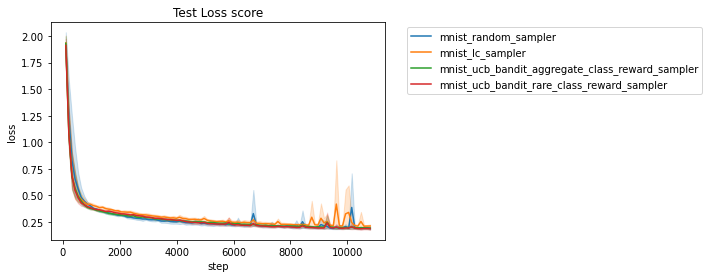

In [133]:
ax = sns.lineplot(x='step', y='loss', data=master_df, hue='sampler_type', ci=95, legend="brief")
ax.legend(loc='upper left',  bbox_to_anchor=(1.05, 1))
plt.title("Test Loss score")
plt.title("Rare Class f1 score")# ax.set_yscale('log')

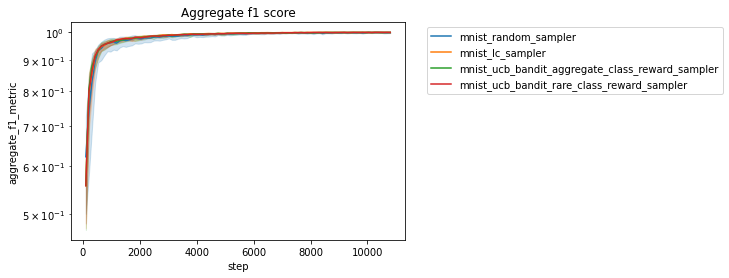

In [142]:
plt.title("Aggregate f1 score")
ax = sns.lineplot(x='step', y='aggregate_f1_metric', data=master_df, hue='sampler_type', ci=95, legend="brief")
ax.legend(loc='upper left',  bbox_to_anchor=(1.05, 1))
ax.set_yscale('log')

Text(0.5, 1.0, 'Rare Class f1 score')

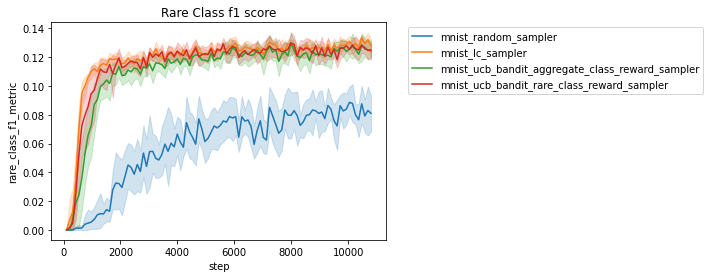

In [136]:
plt.title("Rare Class f1 score")
ax = sns.lineplot(x='step', y='rare_class_f1_metric', data=master_df, hue='sampler_type', ci=95, legend="brief")
ax.legend(loc='upper left',  bbox_to_anchor=(1.05, 1))

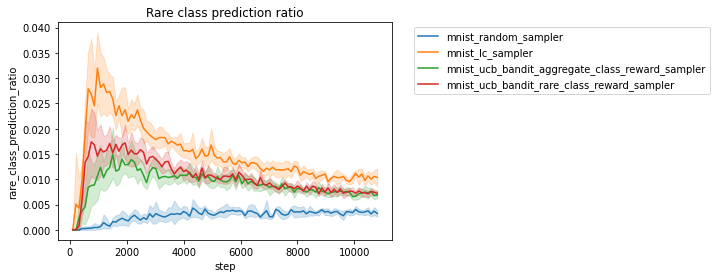

In [137]:
plt.title("Rare class prediction ratio")
ax = sns.lineplot(x='step', y='rare_class_prediction_ratio', data=master_df, hue='sampler_type', ci=95, legend="brief")
ax.legend(loc='upper left',  bbox_to_anchor=(1.05, 1))

# Train Data

In [138]:
master_df = get_result_df(EXPERIMENT_DIR, "train")

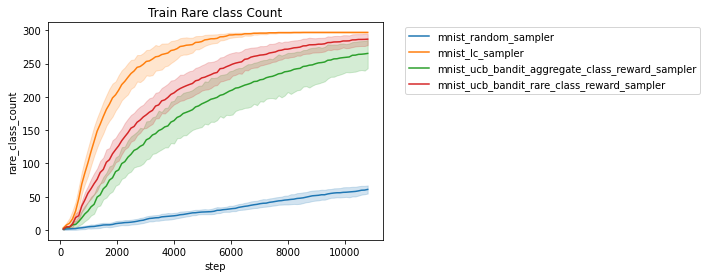

In [139]:
plt.title("Train Rare class Count")
ax = sns.lineplot(x='step', y='rare_class_count', data=master_df, hue='sampler_type', ci=95, legend="brief")
ax.legend(loc='upper left',  bbox_to_anchor=(1.05, 1))

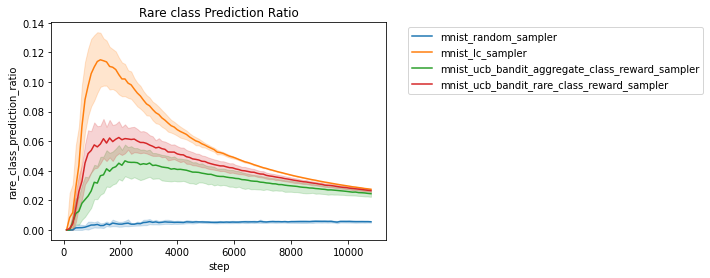

In [140]:
plt.title("Rare class Prediction Ratio")
ax = sns.lineplot(x='step', y='rare_class_prediction_ratio', data=master_df, hue='sampler_type', ci=95, legend="brief")
ax.legend(loc='upper left',  bbox_to_anchor=(1.05, 1))

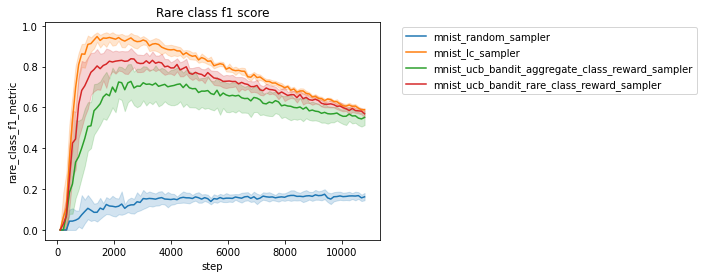

In [141]:
plt.title("Rare class f1 score")
ax = sns.lineplot(x='step', y='rare_class_f1_metric', data=master_df, hue='sampler_type', ci=95, legend="brief")
ax.legend(loc='upper left',  bbox_to_anchor=(1.05, 1))